# ASSIGNMENT-1 COMPUTER VISION

In [1]:
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

OpenCV-Python Lib Version: 4.1.0
Python Version: 3.6.2 (v3.6.2:5fd33b5, Jul  8 2017, 04:57:36) [MSC v.1900 64 bit (AMD64)]


In [3]:
def displayImage(image,title):
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [9]:
img_gray1 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/01.jpg",0) # 0 for grayscal
img_gray2 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/02.jpg",0)
img_gray3 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/03.png",0) 
img_gray4 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/04.jpg",0) 
img_gray5 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/05.jpg",0)
img_gray6 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/06.jpeg",0)
img_gray7 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/07.jpg",0)
img_gray8 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/08.jpg",0) 

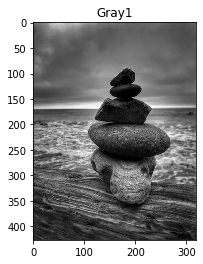

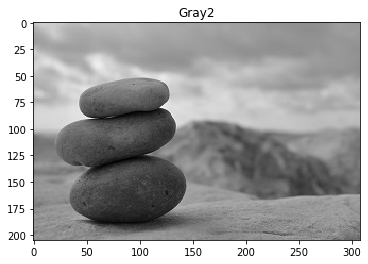

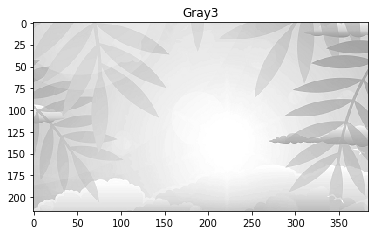

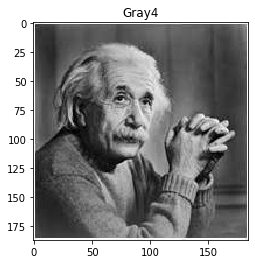

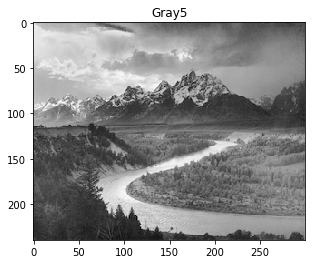

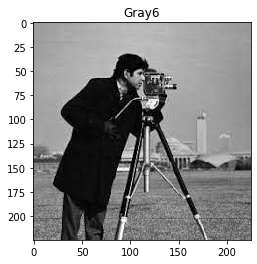

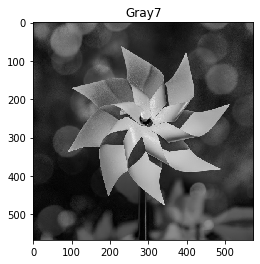

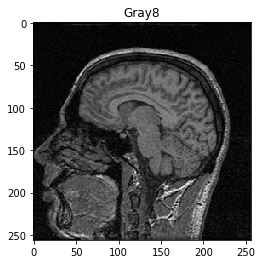

In [10]:
displayImage(img_gray1,"Gray1")
displayImage(img_gray2,"Gray2")
displayImage(img_gray3,"Gray3")
displayImage(img_gray4,"Gray4")
displayImage(img_gray5,"Gray5")
displayImage(img_gray6,"Gray6")
displayImage(img_gray7,"Gray7")
displayImage(img_gray8,"Gray8")

In [11]:
img_color1 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/01.jpg",1) # 1 for colored Image
img_color2 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/02.jpg",1)
img_color3 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/03.png",1) 
img_color4 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/04.jpg",1) 
img_color5 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/05.jpg",1)
img_color6 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/06.jpeg",1)
img_color7 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/07.jpg",1)
img_color8 = cv2.imread("Desktop/CV/Fall2020_CS867_A1/images/08.jpg",1) 

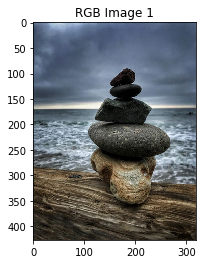

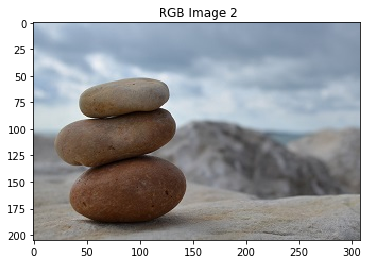

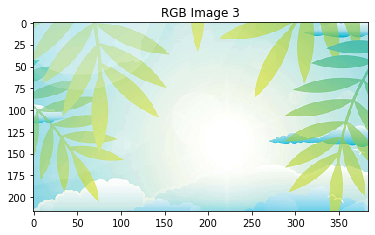

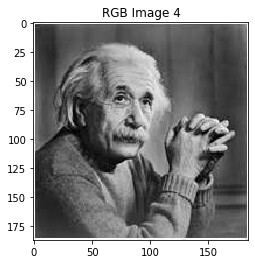

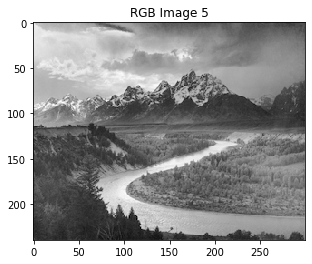

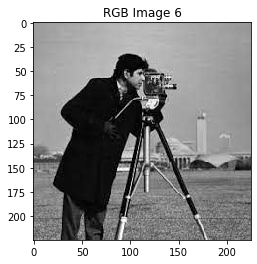

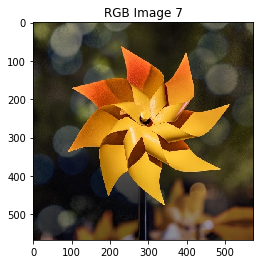

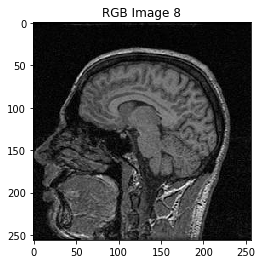

In [12]:
displayImage(img_color1,"RGB Image 1")
displayImage(img_color2," RGB Image 2")
displayImage(img_color3,"RGB Image 3")
displayImage(img_color4,"RGB Image 4")
displayImage(img_color5,"RGB Image 5")
displayImage(img_color6,"RGB Image 6")
displayImage(img_color7,"RGB Image 7")
displayImage(img_color8,"RGB Image 8")


In [13]:
def RgbExclusion( image,n,n1): #helper function 
    image[:, :, n] = 0 # removing color1 
    image[:, :, n1] = 0 # removing color2
    displayImage(image, "Color Excluded Image")

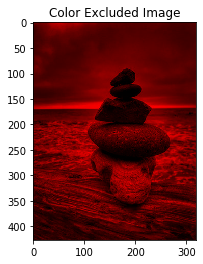

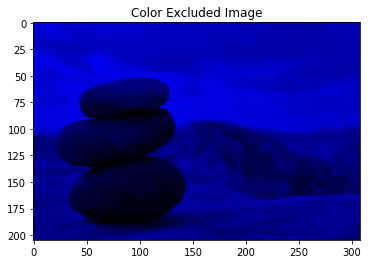

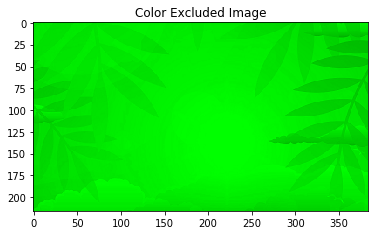

In [14]:
# 0-b, 1-g, 2-r
RgbExclusion(img_color1,0,1)
RgbExclusion(img_color2,1,2)
RgbExclusion(img_color3,0,2)


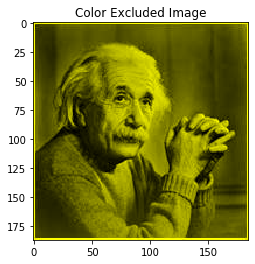

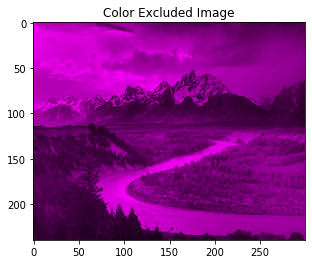

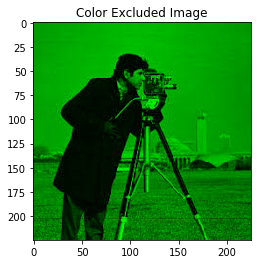

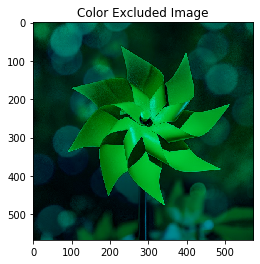

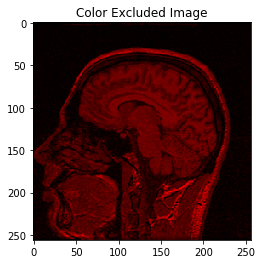

In [15]:
RgbExclusion(img_color4,0,0)
RgbExclusion(img_color5,1,1)
RgbExclusion(img_color6,2,0)
RgbExclusion(img_color7,2,2)
RgbExclusion(img_color8,0,1)

Text(0.5, 1.0, 'Equalized Histogram New')

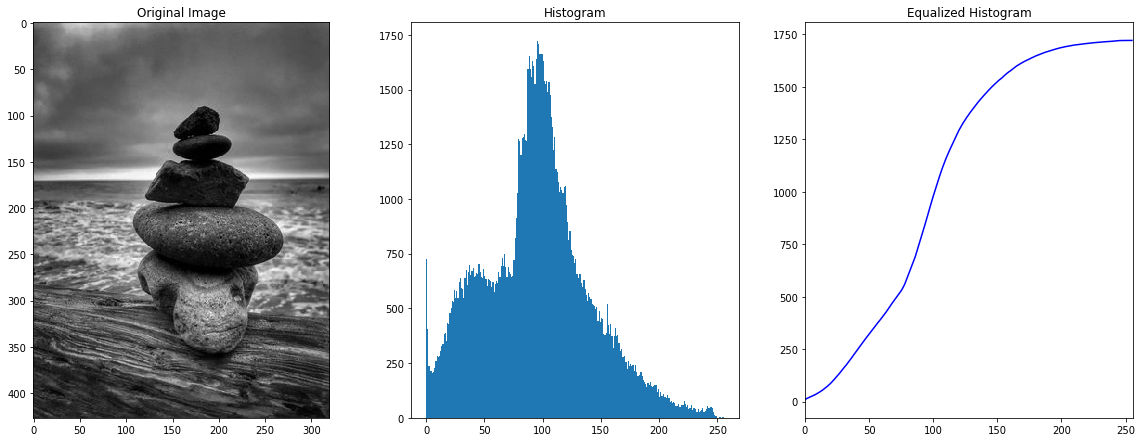

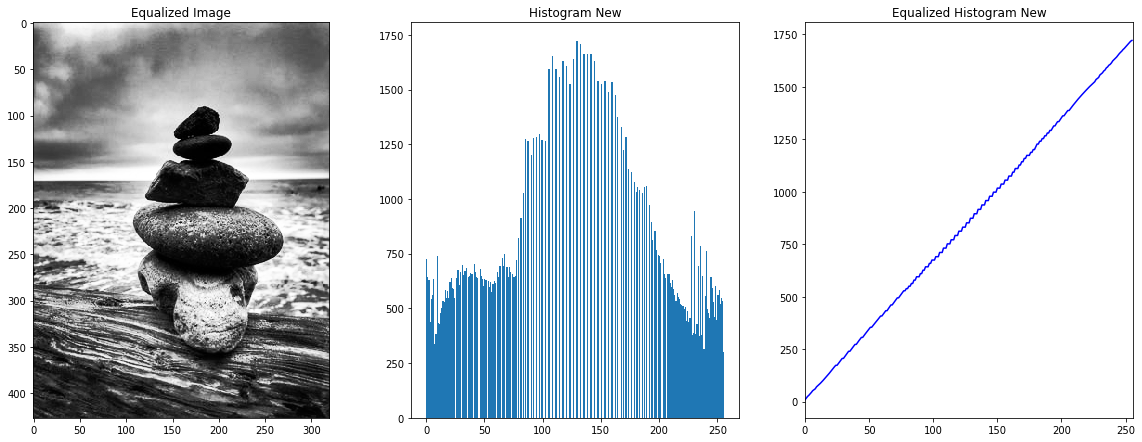

In [16]:
hist,bins = np.histogram(img_gray1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

dst = cv2.equalizeHist(img_gray1)

hist,bins = np.histogram(dst.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_equalized = cdf * hist.max()/ cdf.max()

plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(2, 3, 1)
plt.imshow(img_gray1,cmap=plt.cm.gray)
plt.title("Original Image")
fig.add_subplot(2, 3, 2)
plt.hist(img_gray1.ravel(),256,[0,256]);
plt.title("Histogram")
fig.add_subplot(2, 3, 3)
plt.plot(cdf_normalized, color = 'b')
plt.xlim([0,256])
plt.title("Equalized Histogram")
fig = plt.figure()
fig.add_subplot(2, 3, 1)
plt.imshow(dst,cmap=plt.cm.gray)
plt.title("Equalized Image")
fig.add_subplot(2, 3, 2)
plt.hist(dst.ravel(),256,[0,256]);
plt.title("Histogram New")
fig.add_subplot(2, 3, 3)
plt.plot(cdf_equalized, color = 'b')
plt.xlim([0,256])
plt.title("Equalized Histogram New")

In [17]:
def Convolution(image, kernel):
    """
   
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    """
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    
    # Loop over every pixel of the image and implement convolution operation (element wise multiplication and summation). 
    # You can use two loops. The result is stored in the variable output.
    
    for x in range(image.shape[0]):     # Loop over every pixel of the image
        for y in range(image.shape[1]):
            # element-wise multiplication and summation 
            output[x,y]=(kernel*image_padded[x:x+3,y:y+3]).sum()
        
    
    return output

Text(0.5, 1.0, 'UserDefinedConvolutionSharpen')

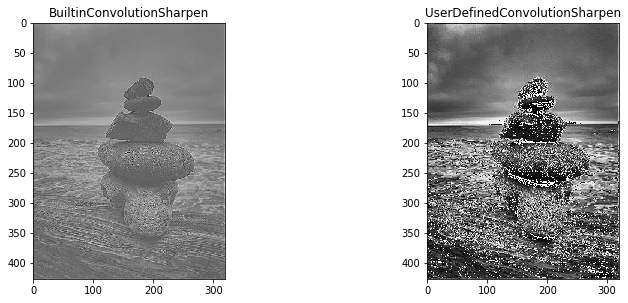

In [18]:

# Convolve the sharpen kernel (laplacian) and the image
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
#Call the function my_convolve2d
image_sharpen = Convolution(img_gray1,kernel)

from scipy import signal
f = signal.convolve2d(img_gray1,kernel, 'same')


plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("BuiltinConvolutionSharpen")
fig.add_subplot(3, 3, 2)
plt.imshow(image_sharpen,cmap=plt.cm.gray)
plt.title("UserDefinedConvolutionSharpen")

Text(0.5, 1.0, 'UserDefinedConvolutionSharpen')

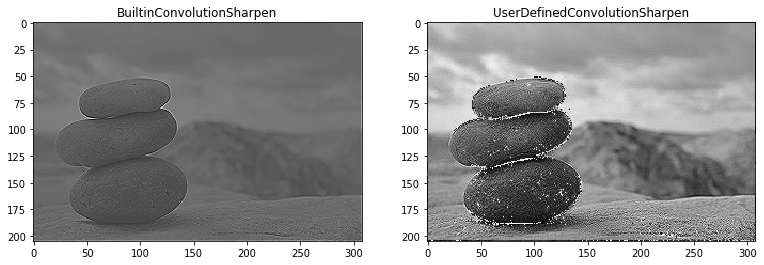

In [19]:
image_conv2 = Convolution(img_gray2,kernel)
f = signal.convolve2d(img_gray2,kernel, 'same')

plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("BuiltinConvolutionSharpen")
fig.add_subplot(3, 3, 2)
plt.imshow(image_conv2,cmap=plt.cm.gray)
plt.title("UserDefinedConvolutionSharpen")

Text(0.5, 1.0, 'UserDefinedConvolutionBlur')

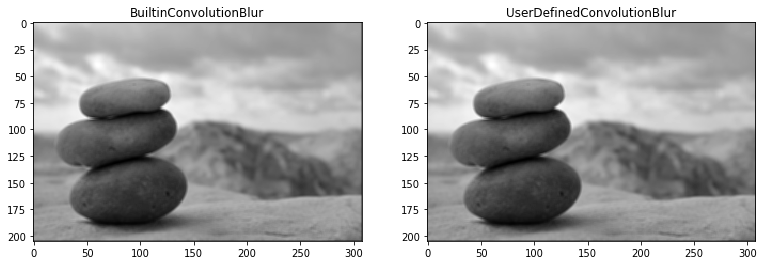

In [20]:
kernel1 = np.ones((3,3),np.float32)/9 #blur
f = signal.convolve2d(img_gray2,kernel1, 'same')
f1=Convolution(img_gray2,kernel1)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("BuiltinConvolutionBlur")
fig.add_subplot(3, 3, 2)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("UserDefinedConvolutionBlur")

Text(0.5, 1.0, 'After Applying Box Filter')

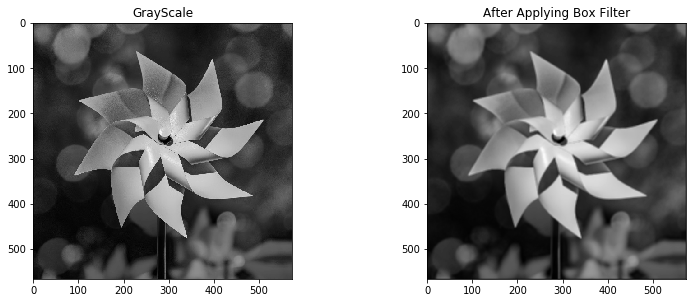

In [21]:
kernel = np.ones((5,5),np.float32)/25 #Box Filter Kernel
output = signal.convolve2d(img_gray7,kernel, 'same')

plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(img_gray7,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(3, 3, 2)
plt.imshow(output,cmap=plt.cm.gray)
plt.title("After Applying Box Filter")


Text(0.5, 1.0, 'After Applying Gaussian Filter, sigma=4')

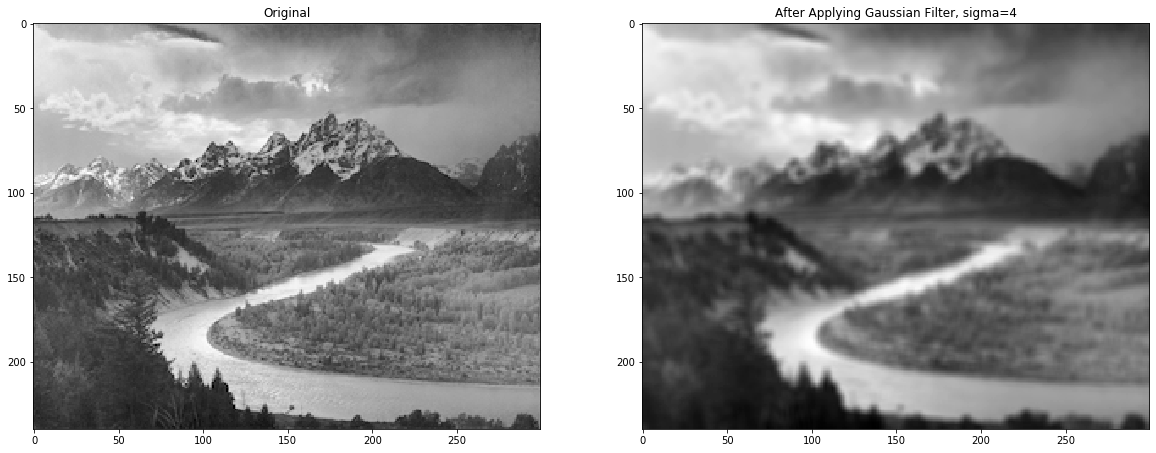

In [22]:
img_gaussianFilter = cv2.GaussianBlur(img_gray5, (5,5),sigmaX=4)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img_gray5,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("After Applying Gaussian Filter, sigma=4")

Text(0.5, 1.0, 'After Applying Gaussian Filter, sigma=7')

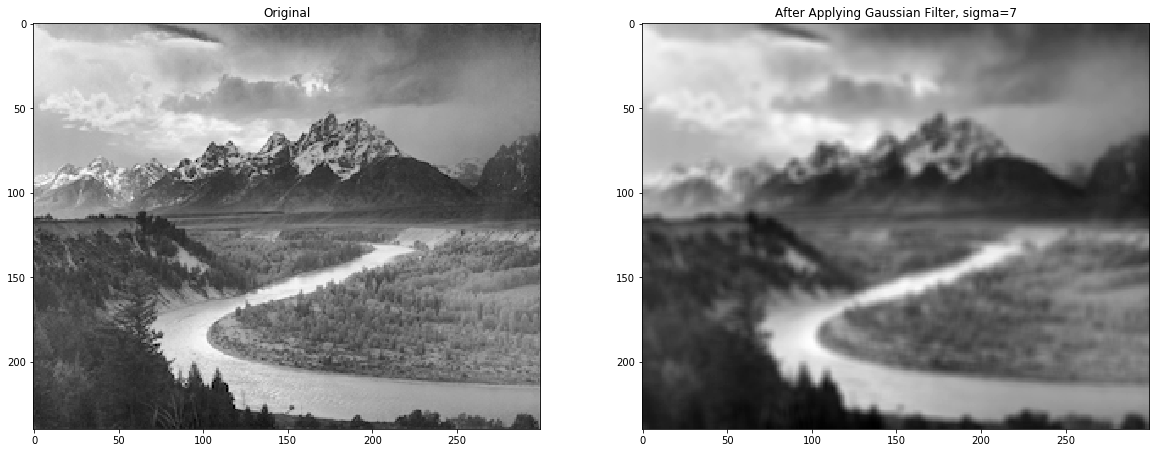

In [23]:
img_gaussianFilter = cv2.GaussianBlur(img_gray5, (5,5),sigmaX=7)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img_gray5,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("After Applying Gaussian Filter, sigma=7")

Text(0.5, 1.0, 'After Applying Gaussian Filter, sigma=1')

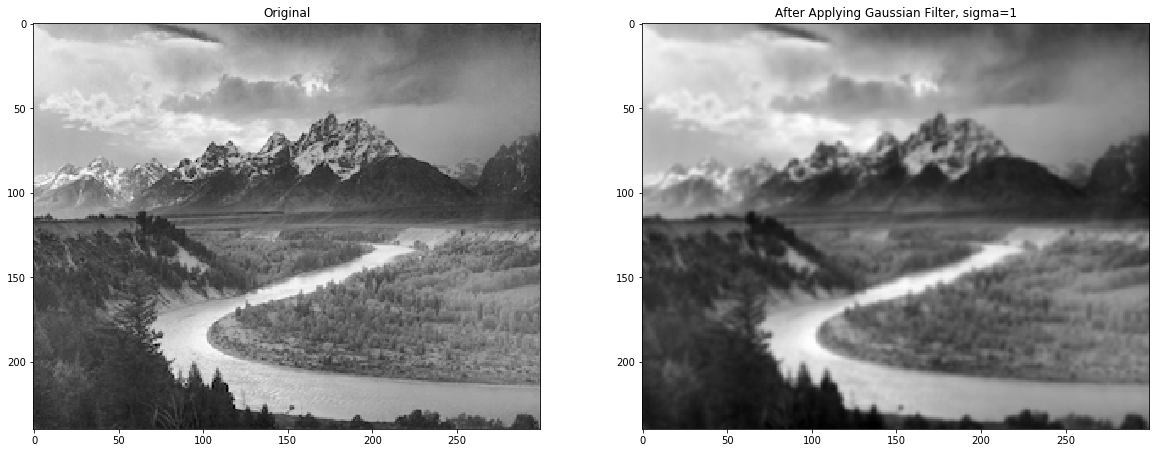

In [24]:
img_gaussianFilter = cv2.GaussianBlur(img_gray5, (5,5),sigmaX=1)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img_gray5,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("After Applying Gaussian Filter, sigma=1")

Text(0.5, 1.0, 'After Applying Gaussian Filter, sigma=15')

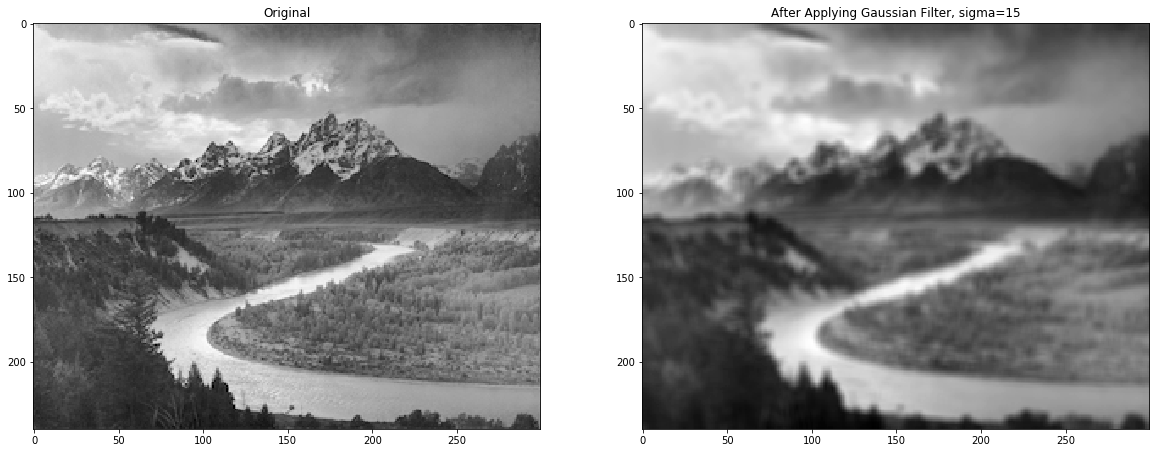

In [25]:
img_gaussianFilter = cv2.GaussianBlur(img_gray5, (5,5),sigmaX=15)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img_gray5,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("After Applying Gaussian Filter, sigma=15")

Text(0.5, 1.0, 'Filtered Image')

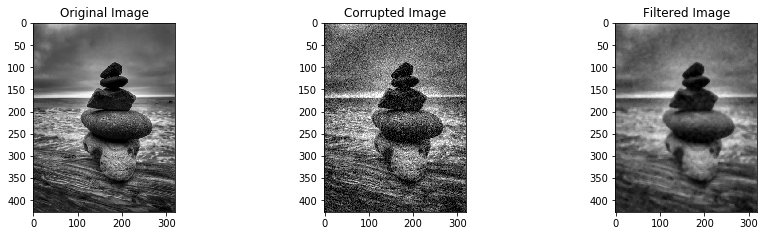

In [88]:
from skimage.util import random_noise
# Add guassian noise to the image.
noise =random_noise(img_gray1, mode='gaussian', seed=None, clip=True)
img=np.float32(noise)
img_gaussianFilter = cv2.medianBlur(img, 7)

fig = plt.figure()

fig.add_subplot(4, 4, 1)
plt.imshow(img_gray1,cmap=plt.cm.gray)
plt.title("Original Image")

fig.add_subplot(4, 4, 2)
plt.imshow(noise,cmap=plt.cm.gray)
plt.title("Corrupted Image")

fig.add_subplot(4, 4, 3)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Filtered Image") 

Text(0.5, 1.0, 'Filtered')

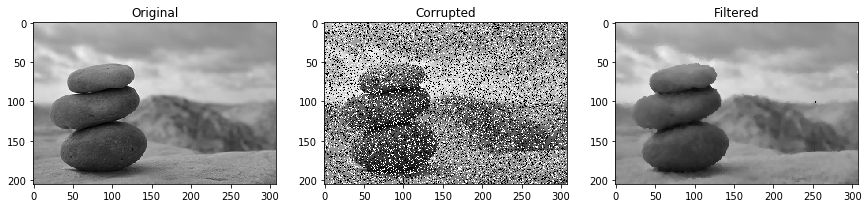

In [51]:
from skimage.util import random_noise
# Add salt-and-pepper noise to the image.
noise = random_noise(img_gray2, mode='s&p',amount=0.3)
noise_img = np.array(255*noise, dtype = 'uint8')

img=np.float32(noise_img)
img_gaussianFilter = cv2.medianBlur(img, 5)

fig = plt.figure()
fig.add_subplot(4, 4, 1)
plt.imshow(img_gray2,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(4, 4, 2)
plt.imshow(noise_img,cmap=plt.cm.gray)
plt.title("Corrupted")
fig.add_subplot(4, 4, 3)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Filtered") 

Text(0.5, 1.0, 'After Applying Median Filter')

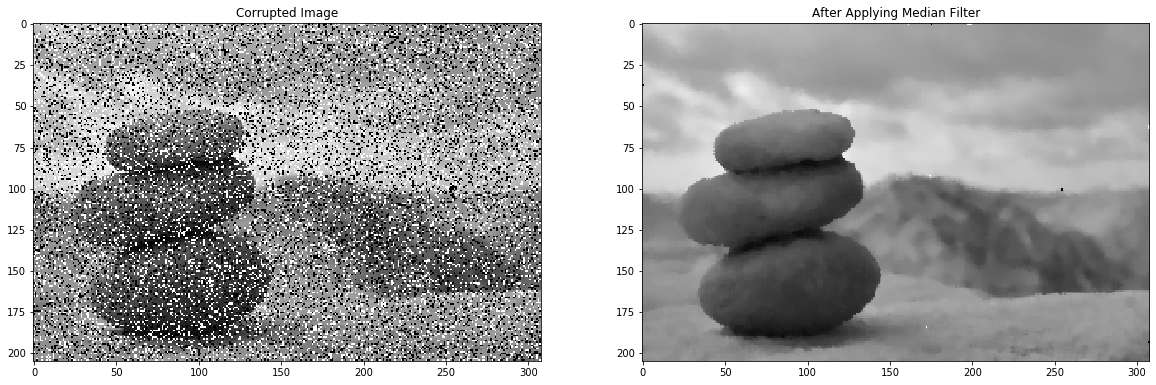

In [52]:
#Median filter
img_med = cv2.medianBlur(noise_img,5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(noise_img,cmap=plt.cm.gray)
plt.title("Corrupted Image")
fig.add_subplot(1, 2, 2)
plt.imshow(img_med,cmap=plt.cm.gray)
plt.title("After Applying Median Filter")

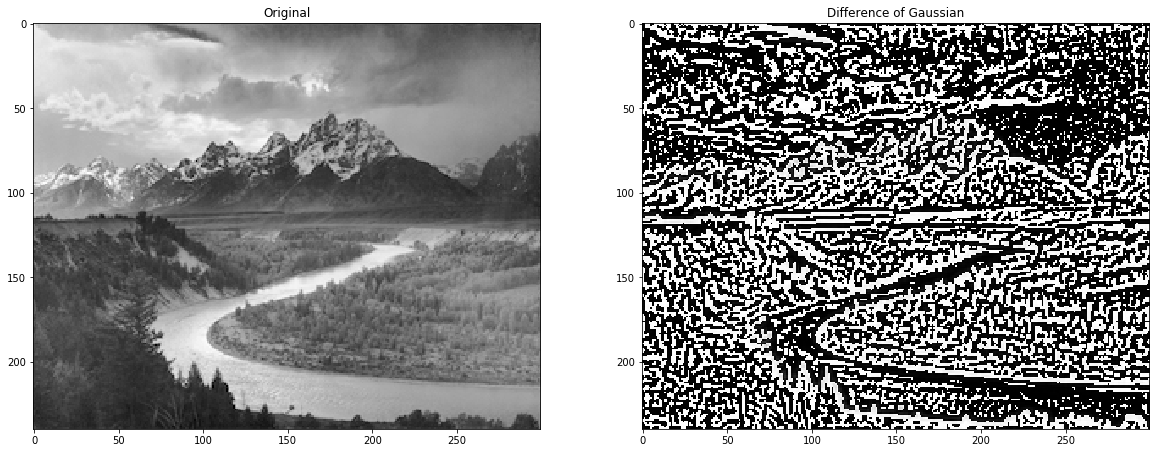

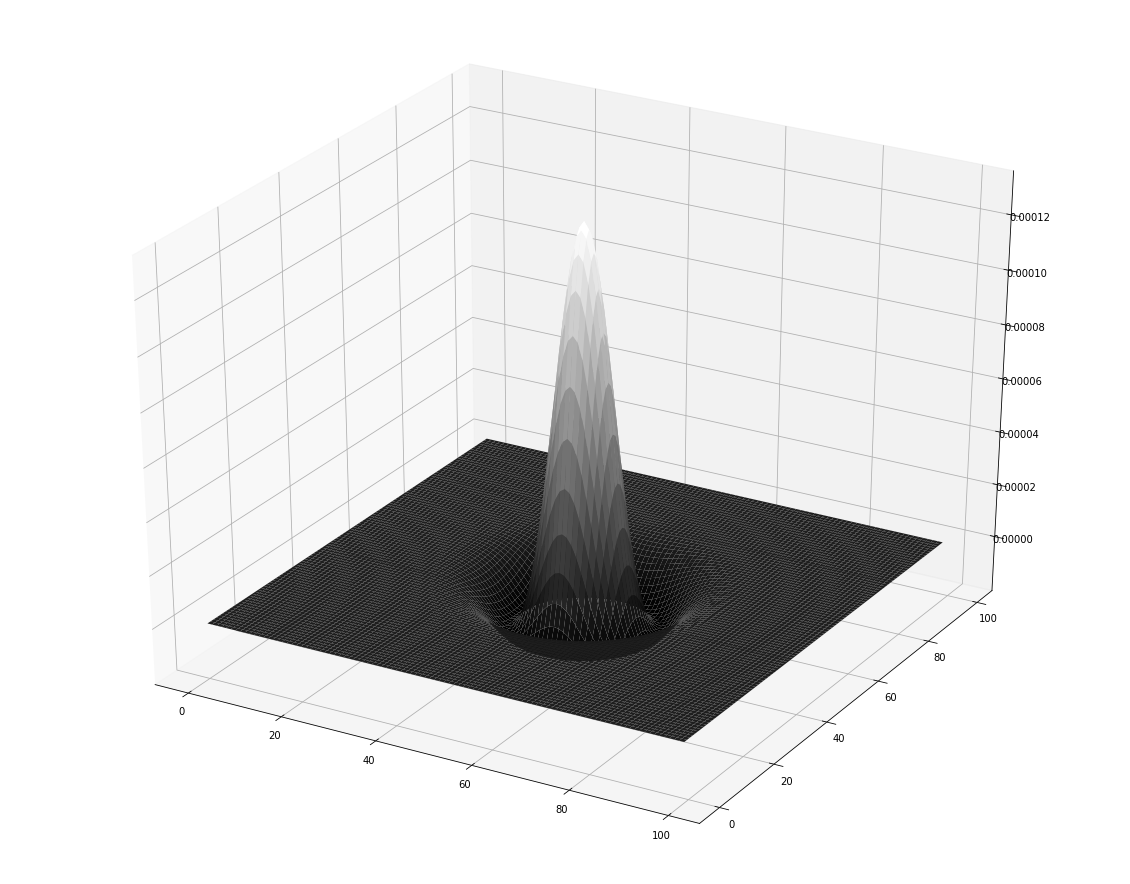

In [53]:
low_sigma = cv2.GaussianBlur(img_gray5,(3,3),1)
high_sigma = cv2.GaussianBlur(img_gray5,(5,5),8)
 
# Calculate the DoG by subtracting
dog = low_sigma - high_sigma

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img_gray5,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(dog,cmap=plt.cm.gray)
plt.title("Difference of Gaussian")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
import numpy as np

img = cv2.resize(dog,(100,100))

def plot_helper(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

N = 100
half_N = N // 2

x, y = np.mgrid[0:img.shape[0], 0:img.shape[1]]

#z = np.sin(0.02*x)*np.sin(0.02*y)

z = -plot_helper(x - half_N, y - half_N, sigma=7)

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)

# show it
plt.show()

In [54]:
# Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
 
# Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

In [55]:
from scipy import signal

def compute_gradients(img,sobelX,sobelY):

    #Sobel X part
    img_SobelX =  cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(2, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(2, 3, 2)
    plt.imshow(img_SobelX,cmap=plt.cm.gray)
    plt.title("Sobel-X")

    #Sobel Y part
    img_SobelY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(3, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(3, 3, 2)
    plt.imshow(img_SobelY,cmap=plt.cm.gray)
    plt.title("Sobel-Y")

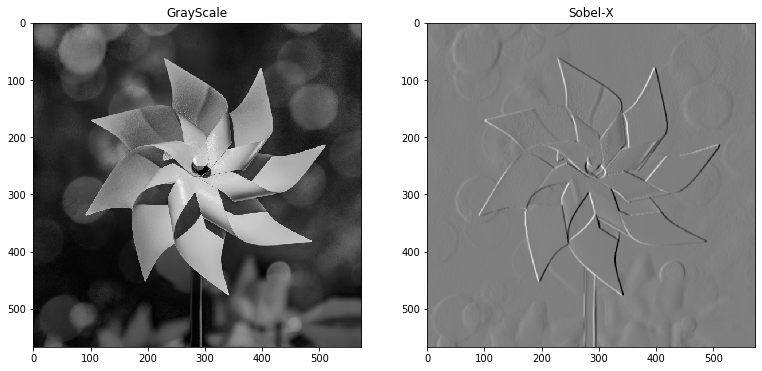

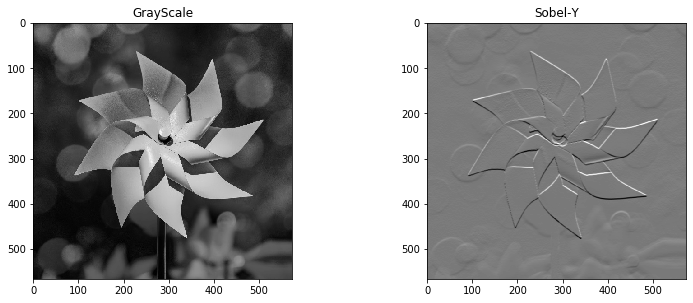

In [56]:
compute_gradients(img_gray7,sobelX,sobelY)

In [57]:
# Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

In [58]:
from scipy import signal

def compute_laplacian(img,laplacian):
    img_Laplacian = cv2.Laplacian(img,cv2.CV_64F)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(1, 3, 2).imshow(img_Laplacian,cmap=plt.cm.gray)
    plt.title("Laplacian")

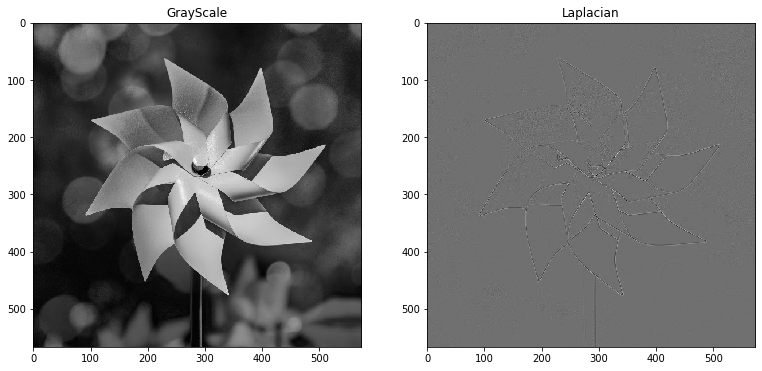

In [59]:
compute_laplacian(img_gray7,laplacian)

Text(0.5, 1.0, 'Canny edge detector')

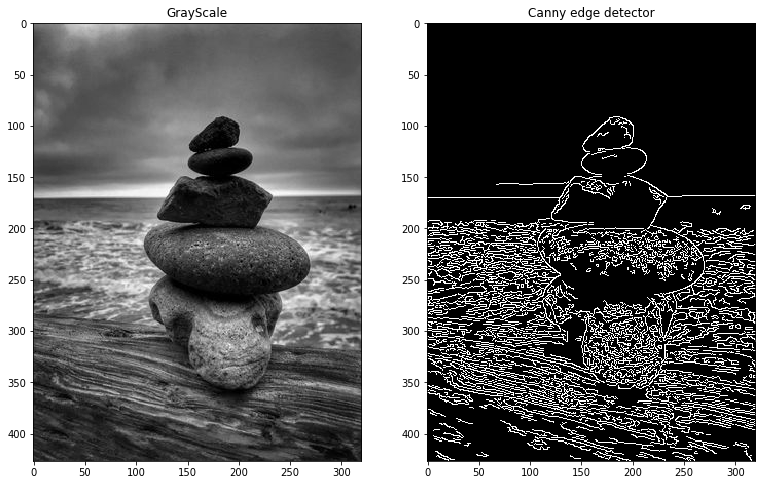

In [60]:
edges = cv2.Canny(img_gray1, 100, 200)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(img_gray1,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
plt.title("Canny edge detector")